## Colab

In [6]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
-o /tmp/sign-language-img.zip


## Local

In [3]:
'''!python -m wget -o C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos https://storage.googleapis.com/platzi-tf2/sign-language-img.zip'''

/usr/bin/python3: No module named wget


## Colab

In [7]:
import os
import zipfile

local_zip = '/content/sign-language-img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sign-language-img')
zip_ref.close()
os.remove(local_zip)

## Local

In [20]:
'''import os
import zipfile

local_zip = 'C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img')
zip_ref.close()
os.remove(local_zip)'''

"import os\nimport zipfile\n\nlocal_zip = 'C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img')\nzip_ref.close()\nos.remove(local_zip)"

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Colab

In [9]:
train_dir = '/content/sign-language-img/Train'
test_dir = '/content/sign-language-img/Test'

## Local

In [ ]:
'''train_dir = 'la local'
test_dir = '/content/sign-language-img/Test''''

In [10]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training',
    )

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation',
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    )


Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [12]:
classes =[char for char in string.ascii_uppercase if char !='J' if char !='Z']

In [13]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

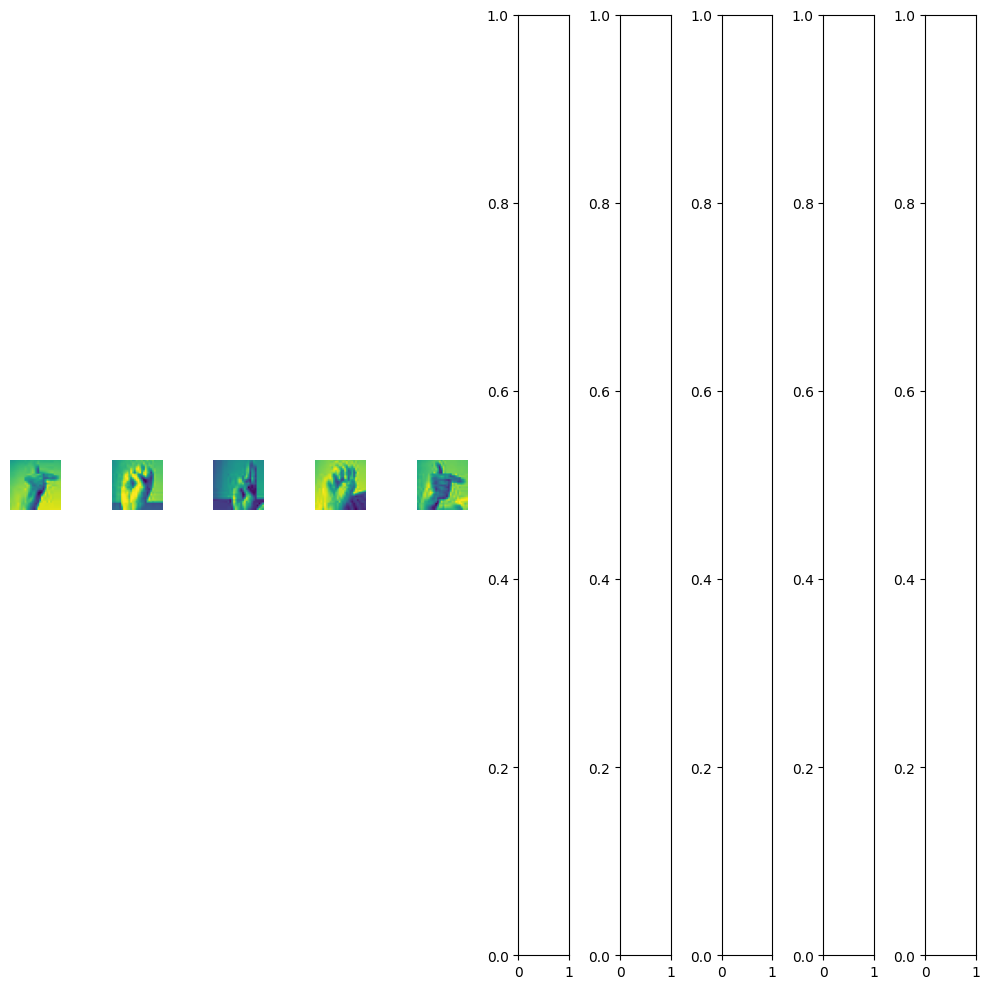

In [15]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

In [16]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_base.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_base.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.2178 - loss: 2.6871 - val_accuracy: 0.4898 - val_loss: 1.6644
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.5900 - loss: 1.3540 - val_accuracy: 0.5747 - val_loss: 1.4500
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7039 - loss: 0.9753 - val_accuracy: 0.6204 - val_loss: 1.1930
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7799 - loss: 0.7216 - val_accuracy: 0.6828 - val_loss: 1.0285
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8387 - loss: 0.5533 - val_accuracy: 0.6751 - val_loss: 1.0893
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8796 - loss: 0.4169 - val_accuracy: 0.7074 - val_loss: 1.0509
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9076 - loss: 0.3292 - val_accuracy: 0.7144 - val_loss: 0.9478
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9364 - loss: 0.2505 - val_accuracy:

In [19]:
results = model_base.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7716 - loss: 1.1603


In [21]:
def visualizacion_resultados(history):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(16, 9)

    ax[0].plot(epochs, train_acc, 'go-', label='Entrenamiento accuracy')
    ax[0].plot(epochs, val_acc, "ro-", label='Validacion accuracy')
    ax[0].set_title('Entrenamiento & validación accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs, train_loss, 'go-', label='Entrenamiento Loss')
    ax[1].plot(epochs, val_loss, "ro-", label='Validacion Loss')
    ax[1].set_title('Entrenamiento & validación Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    plt.show()


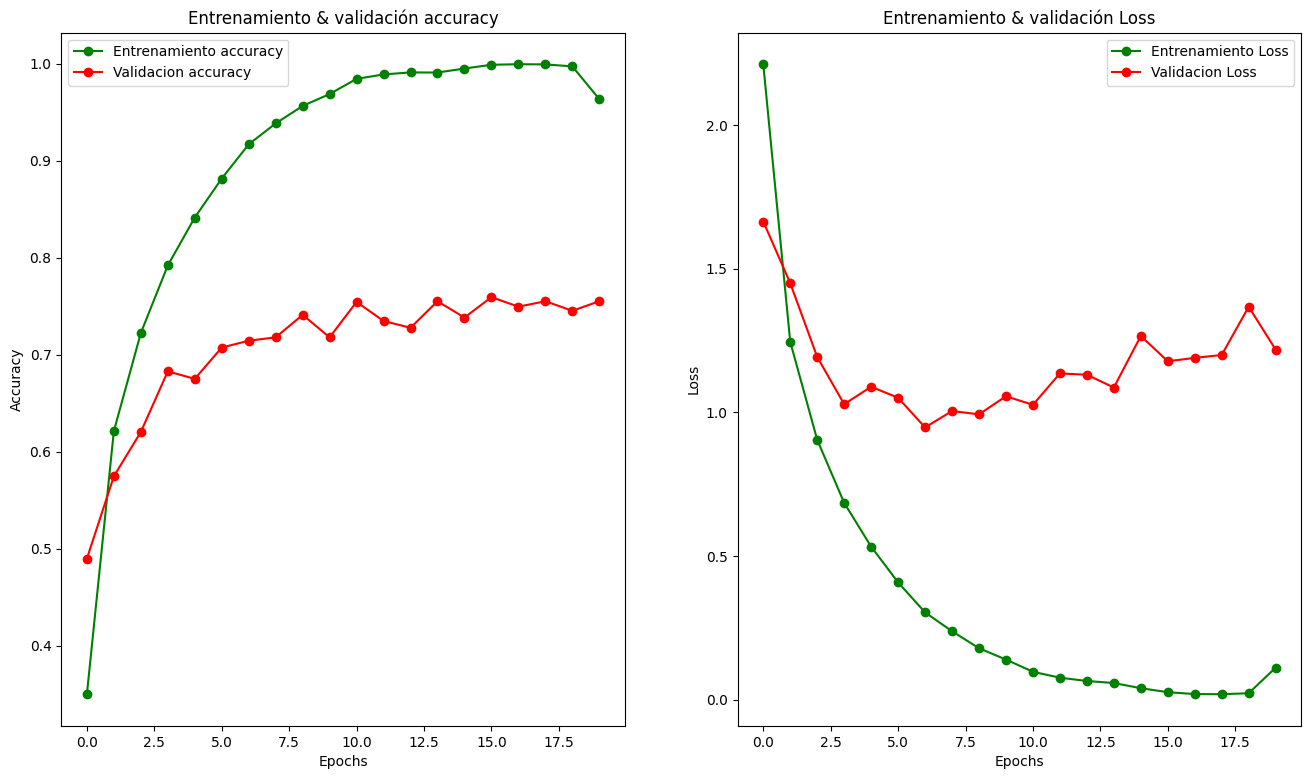

In [22]:
visualizacion_resultados(history)

In [23]:
from tensorflow.keras import layers, models, regularizers

In [30]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.1455 - loss: 2.8920 - val_accuracy: 0.5123 - val_loss: 1.7255
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4543 - loss: 1.6822 - val_accuracy: 0.5621 - val_loss: 1.4107
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.5830 - loss: 1.2581 - val_accuracy: 0.6028 - val_loss: 1.2404
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.6636 - loss: 1.0158 - val_accuracy: 0.6996 - val_loss: 0.9859
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7201 - loss: 0.8383 - val_accuracy: 0.6905 - val_loss: 0.9366
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7601 - loss: 0.7155 - val_accuracy: 0.7228 - val_loss: 0.9102
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7876 - loss: 0.6318 - val_accuracy: 0.7467 - val_loss: 0.8144
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8107 - loss: 0.5672 - val_

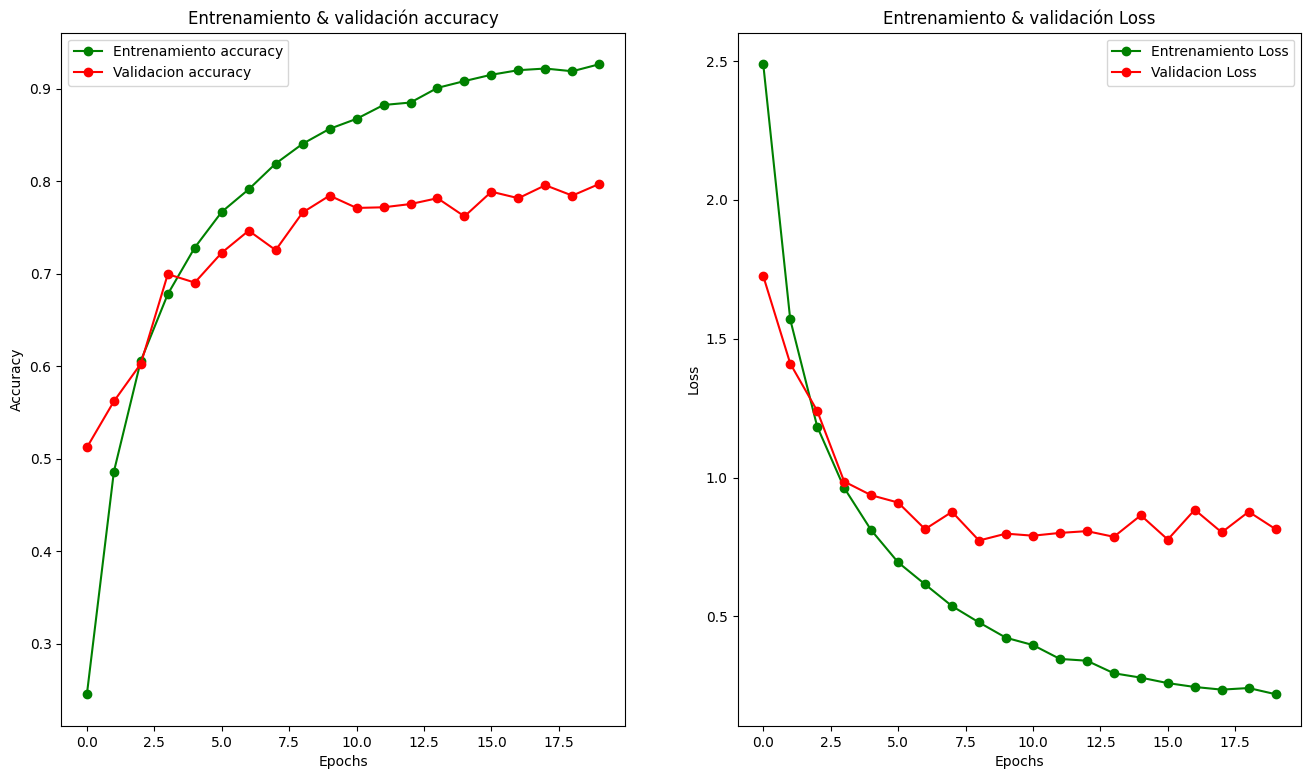

In [32]:
visualizacion_resultados(history_optimizer)

In [33]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       3,245,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,798 (12.52 MB)

 Trainable params: 3,281,798 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.2613 - loss: 2.5243 - val_accuracy: 0.7144 - val_loss: 0.8306
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8276 - loss: 0.5478 - val_accuracy: 0.7846 - val_loss: 0.5957
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9458 - loss: 0.2057 - val_accuracy: 0.8372 - val_loss: 0.5620
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9779 - loss: 0.1075 - val_accuracy: 0.8189 - val_loss: 0.6492
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9858 - loss: 0.0771 - val_accuracy: 0.8414 - val_loss: 0.6549
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9927 - loss: 0.0558 - val_accuracy: 0.8428 - val_loss: 0.6490
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9934 - loss: 0.0505 - val_accuracy: 0.8323 - val_loss: 0.7489
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9953 - loss: 0.0443 - val_a

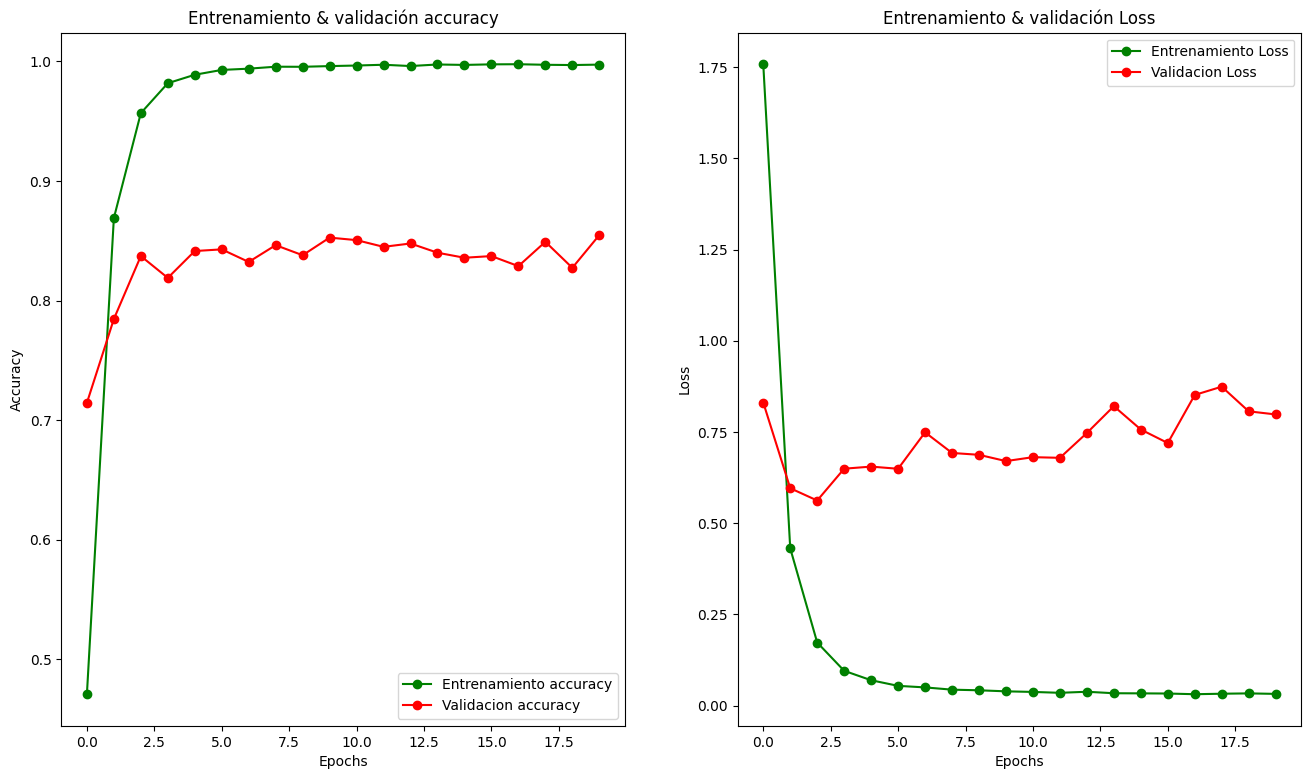

In [34]:
visualizacion_resultados(history_convolutional)

## Callback

In [35]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │       3,245,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,798 (12.52 MB)

 Trainable params: 3,281,798 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import Callback

class TrainingCallBack(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.99:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True


In [42]:
callback = TrainingCallBack()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator,
)

Epoch 1/20
212/215 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9909 - loss: 0.0564Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9909 - loss: 0.0563 - val_accuracy: 0.8470 - val_loss: 0.6937


In [43]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])
  return model

model_early = get_model()

model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │       3,245,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,798 (12.52 MB)

 Trainable params: 3,281,798 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 3, mode = 'auto')

In [47]:
history_early = model_early.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator,
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9963 - loss: 0.0362 - val_accuracy: 0.8589 - val_loss: 0.6829
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9964 - loss: 0.0365 - val_accuracy: 0.8505 - val_loss: 0.8001
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9959 - loss: 0.0384 - val_accuracy: 0.8547 - val_loss: 0.7512


In [48]:
!pip install -q -U keras-tuner
import kerastuner as kt
from tensorflow import keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


<ipython-input-48-0703c731f7cf>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [53]:
def constructor_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = "relu", kernel_regularizer=regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate), loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

## Keras Tuner

In [54]:
tuner = kt.Hyperband(
  constructor_model,
  objective = "val_accuracy",
  max_epochs = 20,
  factor = 3,
  directory = 'models/',
  project_name = 'Platzi-tuner')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
tuner.search(train_generator, epochs = 20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

Trial 30 Complete [00h 03m 09s]
val_accuracy: 0.8631578683853149

Best val_accuracy So Far: 0.8785964846611023
Total elapsed time: 00h 39m 25s


In [56]:
print(best_hps.get('units'))


480


In [57]:
print(best_hps.get('learning_rate'))

0.001


In [58]:
hypermodel = tuner.hypermodel.build(best_hps)

history_tuner = hypermodel.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.3178 - loss: 2.3312 - val_accuracy: 0.7832 - val_loss: 0.7128
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9116 - loss: 0.3176 - val_accuracy: 0.8323 - val_loss: 0.6298
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9817 - loss: 0.1056 - val_accuracy: 0.8386 - val_loss: 0.6166


In [59]:
config_dic = hypermodel.get_config()

In [60]:
print(config_dic)

{'name': 'sequential_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registere

In [63]:
model_some_config = tf.keras.Sequential.from_config(config_dic)

In [64]:
model_some_config.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 480)                 │       6,084,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          61,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,149,894 (23.46 MB)

 Trainable params: 6,149,894 (23.46 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [103]:
model_weight = get_model()
model_weight.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │       3,245,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,798 (12.52 MB)

 Trainable params: 3,281,798 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model_weight.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

In [107]:
checkpoint_path = "model_checkpoints/checkpoint.weights.h5"  # Corrige el nombre de la carpeta y añade la extensión
checkpoint_weights = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',  # Cambia 'frecuency' a 'frequency'
    save_weights_only=True,
    verbose=1
)

In [ ]:
history_weight = model_weight.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

In [ ]:
model_weight.save_weigths("model_manual/my_model")

In [1]:
model_weight2 = get_model()
model_weight2.compile(
    optimizer= "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

NameError: name 'get_model' is not defined

In [ ]:
model_weight2.load_weights(checkpoint_path)

In [ ]:
model_weight2.evaluate(test_generator)

In [ ]:
model_weight.evaluate(test_generator)